In [7]:
#time series in Python from https://www.datacamp.com/community/tutorials/time-series-analysis-tutorial

In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

In [77]:
data=pd.read_csv('/Users/empathybroker/Documents/TimeSeries/multiTimeline.csv',header=0,sep=',')

In [82]:
data.columns=['month','diet','gym','finance']

In [86]:
data.month=pd.to_datetime(data.month)#for time series we need datetime format

In [88]:
data.set_index('month', inplace=True)

Text(0.5,0,'Year')

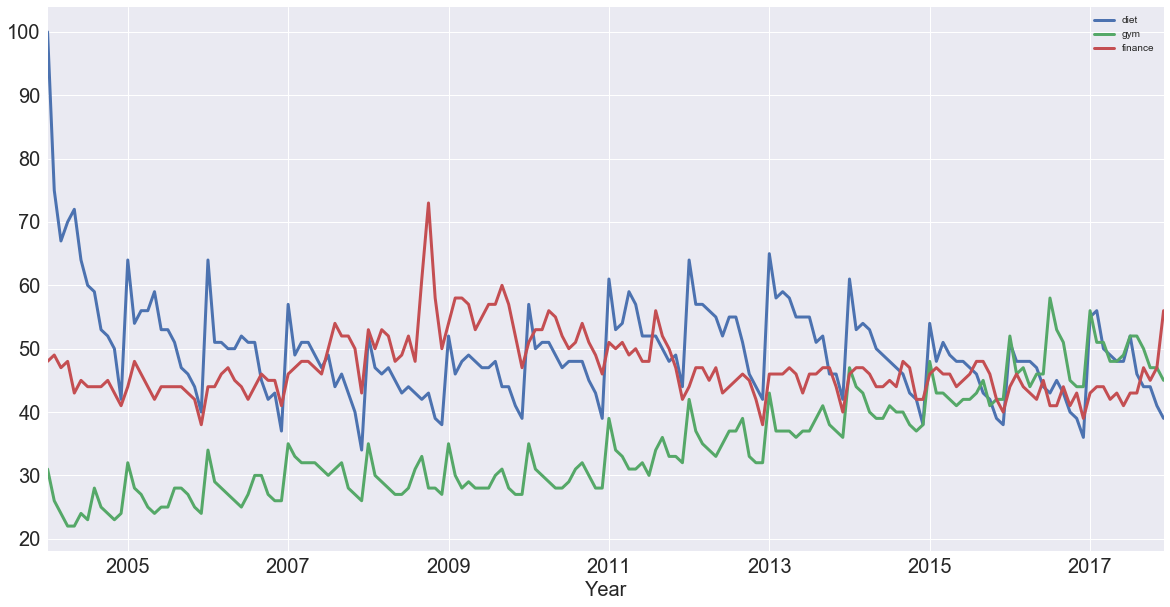

In [96]:
data.plot(figsize=(20,10), linewidth=3, fontsize=20)
plt.xlabel('Year', fontsize=20)

Text(0.5,0,'Year')

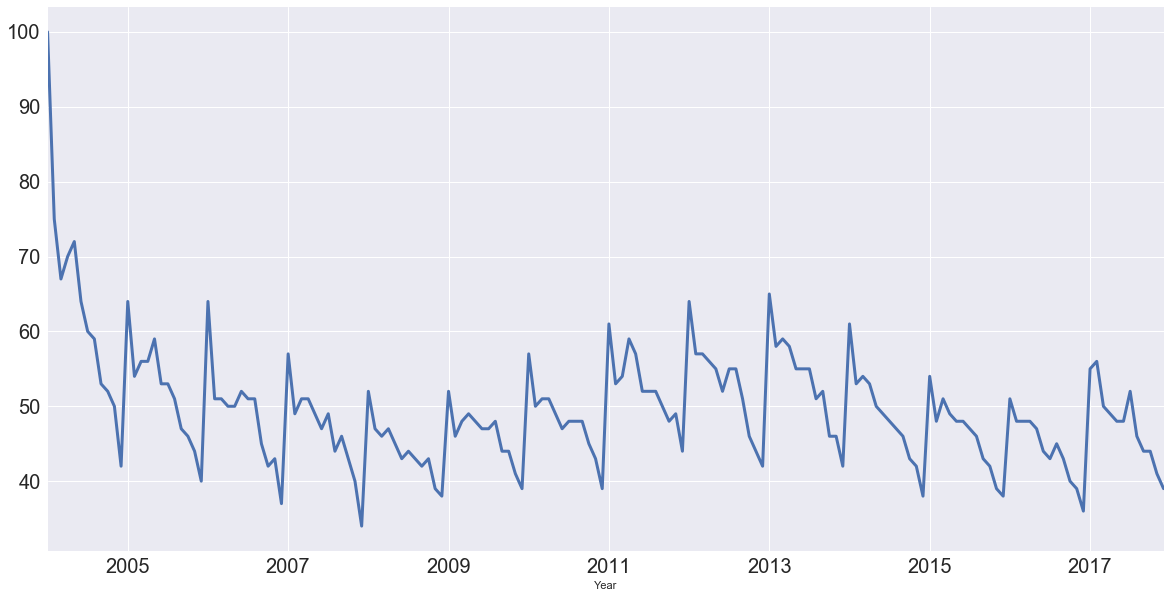

In [99]:
data['diet'].plot(figsize=(20,10),linewidth=3,fontsize=20)
plt.xlabel('Year')

Text(0.5,0,'Year')

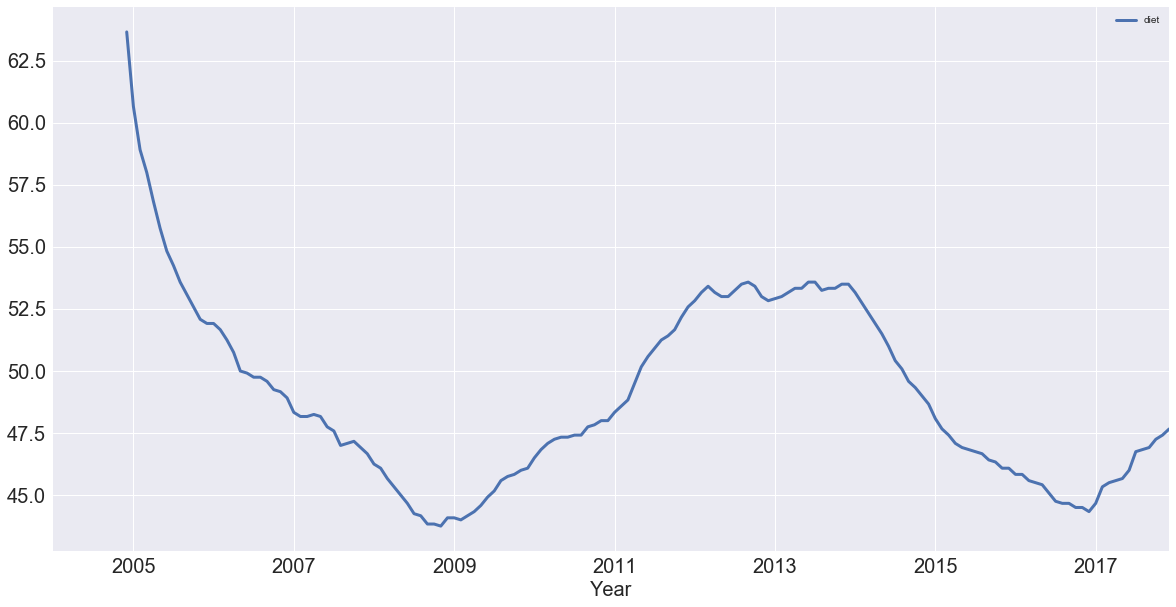

In [107]:
#By doing a rolling average:
diet=data[['diet']]
diet.rolling(12).mean().plot(figsize=(20,10),linewidth=3,fontsize=20)
plt.xlabel('Year',fontsize=20)

Text(0.5,0,'Year')

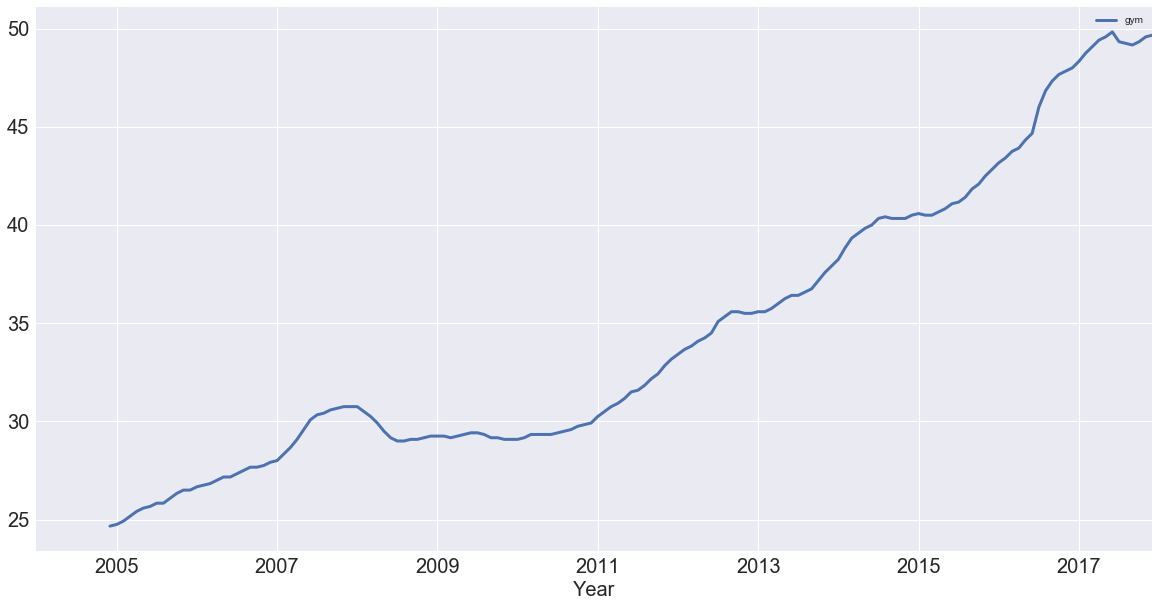

In [109]:
gym=data[['gym']]
gym.rolling(12).mean().plot(figsize=(20,10),linewidth=3,fontsize=20)
plt.xlabel('Year',fontsize=20)

Text(0.5,0,'Year')

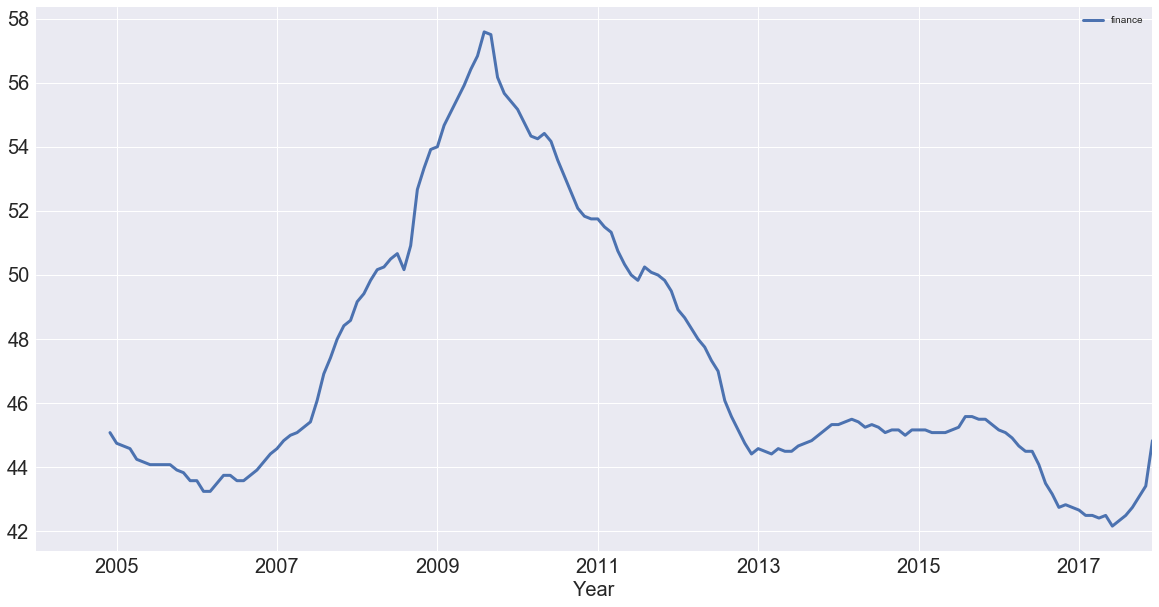

In [111]:
finance=data[['finance']]
finance.rolling(12).mean().plot(figsize=(20,10),fontsize=20,linewidth=3)
plt.xlabel('Year',fontsize=20)

Text(0.5,0,'Year')

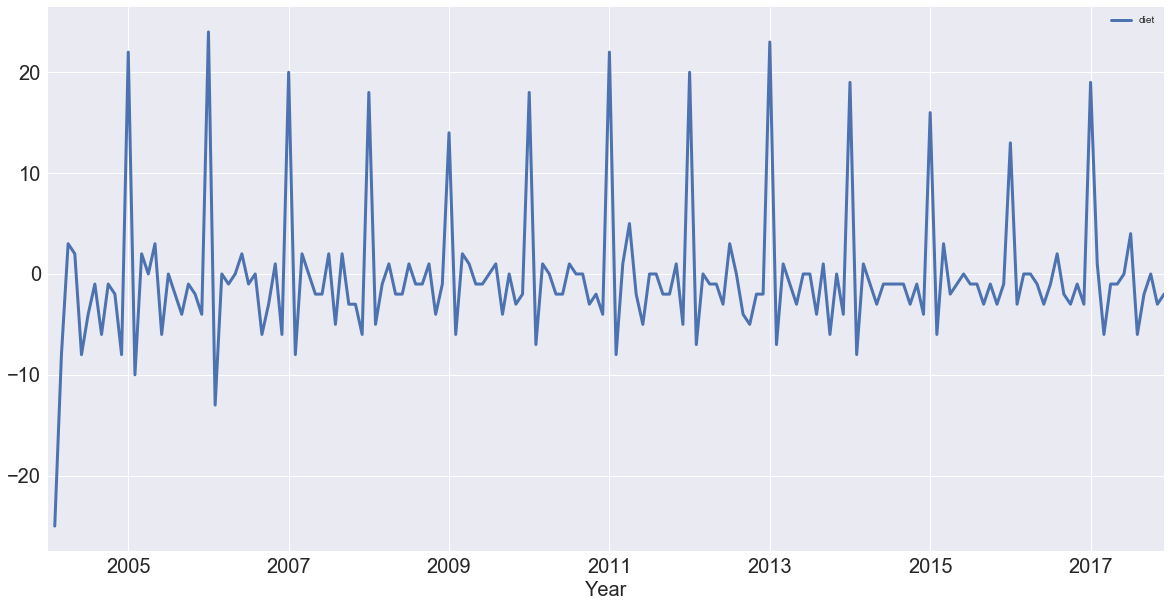

In [115]:
#to better investigate seasonality we can either subtract trends or difference
#we will use differencing as it is a package. First order differencing:
diet.diff().plot(figsize=(20,10),linewidth=3,fontsize=20)
plt.xlabel('Year',fontsize=20)
#This differencing looks only at the difference between successive points, this is, difference
#between a point and the next without caring their absolute positioning

In [117]:
data.corr()#there is a slim negative correlation between them. This means that a higher search 
#for gym gives us a lower search for diet

,diet,gym,finance
diet,1.000000,-0.100764,-0.034639
gym,-0.100764,1.000000,-0.284279
finance,-0.034639,-0.284279,1.000000


Text(0.5,0,'Year')

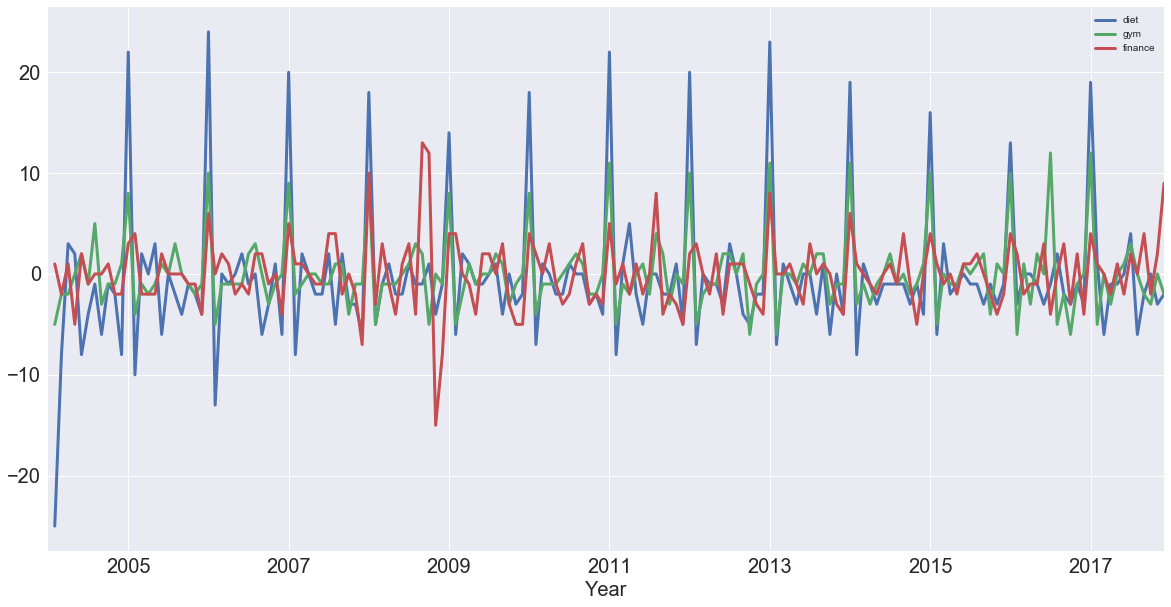

In [118]:
data.diff().plot(figsize=(20,10),linewidth=3,fontsize=20)
plt.xlabel('Year',fontsize=20)

In [120]:
data.diff().corr()#Once removed the trend there is a great correlation

,diet,gym,finance
diet,1.000000,0.758707,0.373828
gym,0.758707,1.000000,0.301111
finance,0.373828,0.301111,1.000000


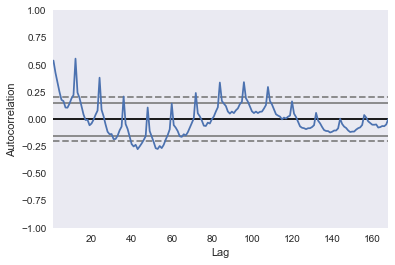

In [121]:
pd.plotting.autocorrelation_plot(diet) #decent autocorrelation every 12 months

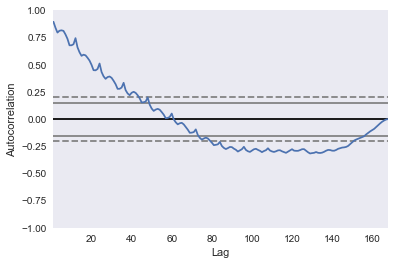

In [122]:
pd.plotting.autocorrelation_plot(gym) #not a great autocorrelation happening here

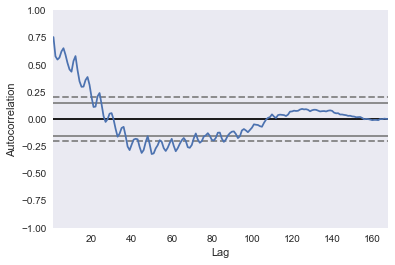

In [123]:
pd.plotting.autocorrelation_plot(finance)

In [124]:
#from here we move on to the ARIMA model https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

1-01
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
1901-06-01    168.5
Name: 266.0, dtype: float64


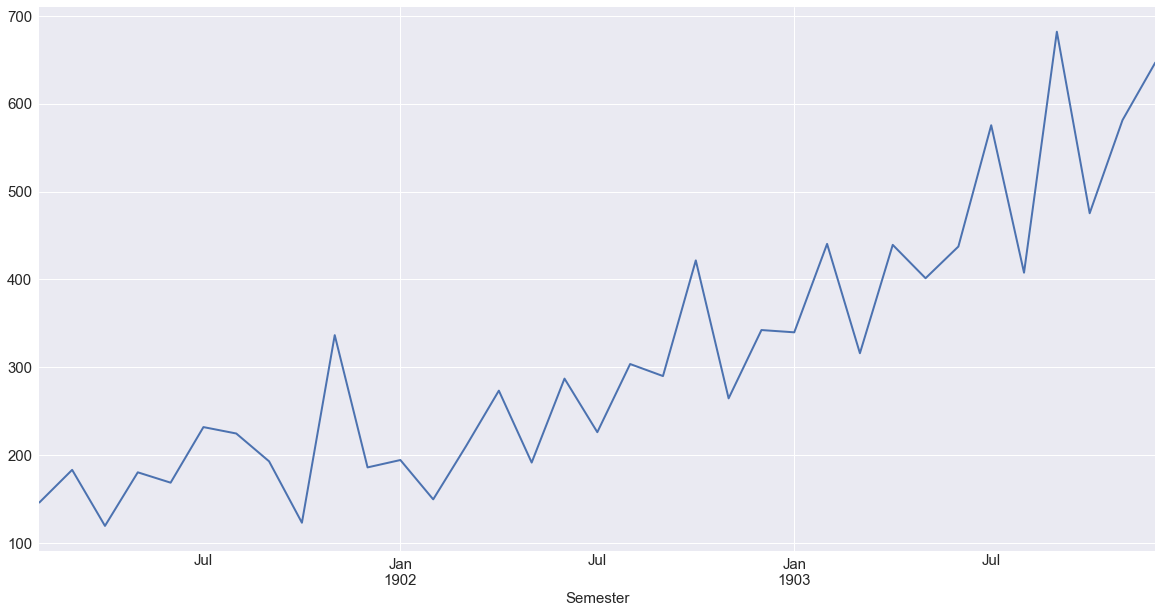

In [139]:
from pandas import read_csv
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
 
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')


series = read_csv('/Users/empathybroker/Documents/TimeSeries/shampoo-sales.csv', header=0, parse_dates=[0],index_col=0, squeeze=True, date_parser=parser)
print(series.head())
series.plot(figsize=(20,10),fontsize=15, linewidth=2)
plt.xlabel('Semester', fontsize=15)
pyplot.show()

/Users/empathybroker/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  """


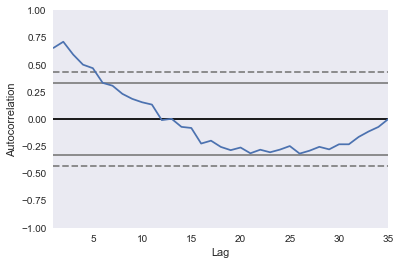

In [143]:
#there is an increasing trend and is therefore not stationary, we have to get rid of the trend
#this will be at least difference order of 1
#Also, we will look at the autocorrelation of this series
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(series)
pyplot.show()

                             ARIMA Model Results                              
Dep. Variable:                D.266.0   No. Observations:                   34
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -188.279
Method:                       css-mle   S.D. of innovations             59.834
Date:                Thu, 01 Mar 2018   AIC                            390.559
Time:                        11:45:15   BIC                            401.243
Sample:                    03-01-1901   HQIC                           394.203
                         - 12-01-1903                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            13.5140      3.340      4.046      0.000       6.968      20.060
ar.L1.D.266.0    -1.1471      0.171     -6.709      0.000      -1.482      -0.812
ar.L2.D.266.0    -0.6961      0.265     

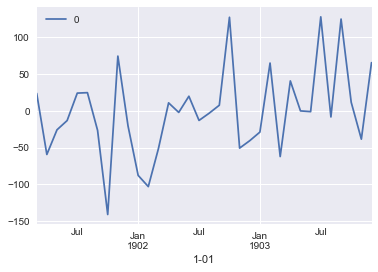

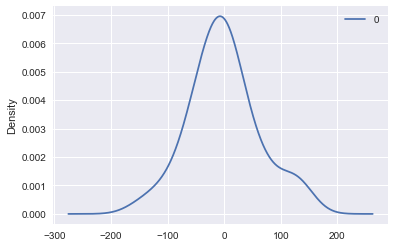

                0
count   34.000000
mean    -0.864573
std     61.112748
min   -141.014178
25%    -36.113764
50%     -2.684367
75%     24.004665
max    127.834573


In [146]:
#this shows a positive correlation for the first 12 lags, with special significance up to 5 lags
#we implement the arima model for (5,1,0) this is lag=5, diff=1 and moving average model of 0

#this is to fit the model
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(series, order=(5,1,0))
model_fit=model.fit(disp=0)
print(model_fit.summary())

#we plot the residual errors
from pandas import DataFrame
residuals=DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

predicted=326.860816, expected=339.700000
predicted=391.723511, expected=440.400000
predicted=353.007331, expected=315.900000
predicted=385.696641, expected=439.300000
predicted=367.847677, expected=401.300000
predicted=448.604971, expected=437.400000
predicted=401.917974, expected=575.500000
predicted=429.887378, expected=407.600000
predicted=514.778090, expected=682.000000
predicted=442.026656, expected=475.300000
predicted=651.955376, expected=581.300000
predicted=561.306342, expected=646.900000
Test MSE: 6670.443


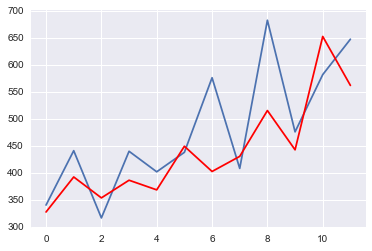

In [148]:
#since the density plot is not centered in zero, there is a bias in the prediction
#using ARIMA model to forecast
from sklearn.metrics import mean_squared_error
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()


In [154]:
#another approach using quandl
import quandl
quandl.ApiConfig.api_key = '_hCKm8PtGazCoGvR1gyz'

#retrieving the TSLA
tesla=quandl.get('WIKI/TSLA')

#Retrieve the GM data
gm=quandl.get('WIKI/GM')

gm.head(5)

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2010-11-18,35.00,35.99,33.89,34.19,457044300.0,0.0,1.0,29.988317,30.836558,29.037259,29.294302,457044300.0
2010-11-19,34.15,34.50,33.11,34.26,107842000.0,0.0,1.0,29.260029,29.559912,28.368948,29.354278,107842000.0
2010-11-22,34.20,34.48,33.81,34.08,36650600.0,0.0,1.0,29.302870,29.542776,28.968714,29.200053,36650600.0
2010-11-23,33.95,33.99,33.19,33.25,31170200.0,0.0,1.0,29.088668,29.122940,28.437493,28.488901,31170200.0
2010-11-24,33.73,33.80,33.22,33.48,26138000.0,0.0,1.0,28.900170,28.960146,28.463197,28.685967,26138000.0


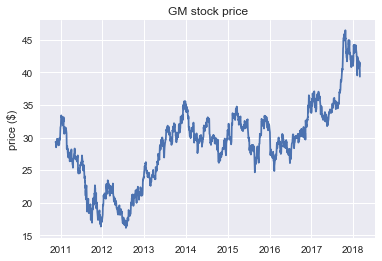

Text(0,0.5,'price ($)')

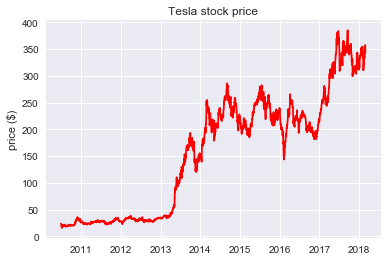

In [161]:
plt.plot(gm.index,gm['Adj. Close'])
plt.title('GM stock price')
plt.ylabel('price ($)')
plt.show()
plt.plot(tesla.index,tesla['Adj. Close'], 'r')
plt.title('Tesla stock price')
plt.ylabel('price ($)')

In [165]:
#to add capital, needed amount of shares
tesla_shares = {2018: 168e6, 2017: 162e6, 2016: 144e6, 2015: 128e6, 2014: 125e6, 2013: 119e6, 2012: 107e6, 2011: 100e6, 2010: 51e6}
gm_shares = {2018: 1.42e9, 2017: 1.50e9, 2016: 1.54e9, 2015: 1.59e9, 2014: 1.61e9, 2013: 1.39e9, 2012: 1.57e9, 2011: 1.54e9, 2010:1.50e9}
tesla['year']=tesla.index.year
tesla.reset_index(level=0, inplace=True) #this makes the year a column rather than an index

In [174]:
tesla['cap']=0 #this creates a column with 0s in ['cap]
for i, year in enumerate(tesla['year']):
    shares=tesla_shares.get(year)
    tesla.loc[i, 'cap'] = shares * tesla.loc[i, 'Adj. Close']

In [175]:
tesla

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,year,cap
0,2010-06-29,19.0000,25.0000,17.5400,23.8900,18766300.0,0.0,1.0,19.0000,25.0000,17.5400,23.8900,18766300.0,2010,1.218390e+09
1,2010-06-30,25.7900,30.4192,23.3000,23.8300,17187100.0,0.0,1.0,25.7900,30.4192,23.3000,23.8300,17187100.0,2010,1.215330e+09
2,2010-07-01,25.0000,25.9200,20.2700,21.9600,8218800.0,0.0,1.0,25.0000,25.9200,20.2700,21.9600,8218800.0,2010,1.119960e+09
3,2010-07-02,23.0000,23.1000,18.7100,19.2000,5139800.0,0.0,1.0,23.0000,23.1000,18.7100,19.2000,5139800.0,2010,9.792000e+08
4,2010-07-06,20.0000,20.0000,15.8300,16.1100,6866900.0,0.0,1.0,20.0000,20.0000,15.8300,16.1100,6866900.0,2010,8.216100e+08
5,2010-07-07,16.4000,16.6300,14.9800,15.8000,6921700.0,0.0,1.0,16.4000,16.6300,14.9800,15.8000,6921700.0,2010,8.058000e+08
6,2010-07-08,16.1400,17.5200,15.5700,17.4600,7711400.0,0.0,1.0,16.1400,17.5200,15.5700,17.4600,7711400.0,2010,8.904600e+08
7,2010-07-09,17.5800,17.9000,16.5500,17.4000,4050600.0,0.0,1.0,17.5800,17.9000,16.5500,17.4000,4050600.0,2010,8.874000e+08
8,2010-07-12,17.9500,18.0700,17.0000,17.0500,2202500.0,0.0,1.0,17.9500,18.0700,17.0000,17.0500,2202500.0,2010,8.695500e+08
9,2010-07-13,17.3938,18.6400,16.9000,18.1400,2680100.0,0.0,1.0,17.3938,18.6400,16.9000,18.1400,2680100.0,2010,9.251400e+08


In [179]:
#do the same for gm
gm['year']=gm.index.year
gm.reset_index(level=0, inplace=True) #this makes the year a column rather than an index
gm['cap']=0 #this creates a column with 0s in ['cap]
for i, year in enumerate(gm['year']):
    shares=gm_shares.get(year)
    gm.loc[i, 'cap'] = shares * gm.loc[i, 'Adj. Close']

AttributeError: 'RangeIndex' object has no attribute 'year'

In [184]:
#now we merge both sets to compare them better
# Merge the two datasets and rename the columns
cars = gm.merge(tesla, how='inner', on='Date')
cars.rename(columns={'cap_x': 'gm_cap', 'cap_y': 'tesla_cap'}, inplace=True)
# Select only the relevant columns
cars = cars.loc[:, ['Date', 'gm_cap', 'tesla_cap']]
# Divide to get market cap in billions of dollars
cars['gm_cap'] = cars['gm_cap'] / 1e9
cars['tesla_cap'] = cars['tesla_cap'] / 1e9
cars.head()

,Date,gm_cap,tesla_cap
0,2010-11-18,43.941453,1.52439
1,2010-11-19,44.031417,1.58049
2,2010-11-22,43.800079,1.70340
3,2010-11-23,42.733352,1.76307
4,2010-11-24,43.028951,1.80897


In [185]:
len(cars)

1830